# Analysis

The final stroke of the project involve analysing the networks created:

In [1]:
## import required packages
import os
import pickle as pkl
import pandas as pd
import networkx as nx
import numpy as np
from numpy.random import RandomState
rng = RandomState(781772)
import logging
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from pprint import pprint
## graphics:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['seaborn-poster'])

# home-made packages
import network_artist as artist
from infnet_helper import *

In [2]:
lookup_combined_toks = prepare_toks(with_pdf2txt=False)

In [3]:
lookup_poinf = get_lookup_poinf()

In [4]:
# remove individuals without  any publications since they wont appear in the collab net
lookup_poinf.dropna(subset=['pub_ids'], inplace=True)
print(len(lookup_poinf))

224


In [5]:
lookup_poinf.head(3)

,last_name,first_name,personal_url,position,parent,institute,full_name,institute_class,alias,first_pub_year,total_pub,total_pub_1997,total_pub_2012,pub_ids
id,,,,,,,,,,,,,,
d089bb44-7d0b-4b3f-b556-27def993d1d1,albrecht,stefano,http://www.research.ed.ac.uk/portal/en/persons...,lecturer in artificial intelligence,school of informatics,centre for intelligent systems and their appli...,albrecht stefano,1,"albrecht, s. v.|albrecht, s.",2014.0,12,12,12,"{5b69211e-5874-4c07-a3cb-545f09bfe70c, 990f481..."
ecd799fb-4f63-44ae-a078-b009099f2c8c,alex,beatrice,http://www.research.ed.ac.uk/portal/en/persons...,research fellow,school of informatics,institute of language cognition and computation,alex beatrice,2,"alex, b. (ed.)|alex, b.|symington, b.",2012.0,43,43,20,"{5d00df5f-3359-4188-afc2-4ebadf8d826e, 5c90210..."
1997d4be-de27-44bd-ad89-36e6f386225d,alexandru,cristina,http://www.research.ed.ac.uk/portal/en/persons...,research associate,school of informatics,centre for intelligent systems and their appli...,alexandru cristina,1,"alexandru, c.|alexandru, c. a.|alexandru, c-a.",2011.0,9,9,7,"{d850fd37-078c-4526-bcc4-fec310dc2728, ebe0d59..."


In [6]:
lookup_pub = get_lookup_pub(1997,2017)

In [7]:
lookup_pub.head(3)

,year,title,authors,shortnames,nb_authors,nb_shortnames,collab_id,edges,collab_poinf,nb_poinf
pub_id,,,,,,,,,,
18b1a861-afef-4fff-bc80-d02e05be18c4,2013,query processing in data integration,"[paolo guagliardo, piotr wieczorek]","[guagliardo, p., wieczorek, p.]",2,2,"[653c9723-b374-4ad3-9cef-0f7e7f45d812, 4886]","[(653c9723-b374-4ad3-9cef-0f7e7f45d812, 4886)]",[653c9723-b374-4ad3-9cef-0f7e7f45d812],1
d5814bab-5fc2-4c31-92b7-543c7ce75cb4,2012,evaluation of speaker verification security an...,"[p.l. de leon, m. pucher, j. yamagishi, i. her...","[leon, p. l., pucher, m., yamagishi, j., herna...",5,5,"[3084, 4137, 4d11a99a-0d04-42f4-8089-d433a57c2...","[(3084, 4137), (3084, 4d11a99a-0d04-42f4-8089-...",[4d11a99a-0d04-42f4-8089-d433a57c2463],1
880944d3-26db-4003-9186-130bf3202941,2014,openairinterface a flexible platform for g res...,"[navid nikaein, mahesh k. marina, saravana man...","[nikaein, n., marina, m. k., manickam, s., daw...",6,6,"[796, 06760916-edca-488e-93da-baff6204a453, 54...","[(796, 06760916-edca-488e-93da-baff6204a453), ...",[06760916-edca-488e-93da-baff6204a453],1


In [8]:
def test_symmetric(mat):
    return np.allclose(mat, mat.T)

In [9]:
def get_mixing_dict(g,
                    characteristic_name,
                    characteristic_type='attribute',
                    weight=None,
                    target_order=None):
    """
    target_order is however you want the matrix and _atributes to be arrange, mainly for printing
    """
    
    assert characteristic_type in [
        'attribute', 'numeric', 'degree'
    ], 'only accepts "attribute" or "numeric" or "degree"'

    if characteristic_type == 'attribute':
        mixing_dict = nx.attribute_mixing_dict(
            g, attribute=characteristic_name)
    elif characteristic_type == 'numeric':
        mixing_dict = nx.degree_mixing_dict(
            g, attribute=characteristic_name, weight=weight)
    elif characteristic_type == 'degree':
        mixing_dict = nx.degree_mixing_dict(g, weight=weight)

    num_attributes = len(list(mixing_dict.keys()))
    _attributes = list(mixing_dict.keys())
    if target_order is not None:
        for t in target_order:
            # ensure that the list is identical!
            assert t in _attributes, 'given order have {}, but not observed in g'.format(t)
        _attributes = target_order
        
    mat = np.zeros((num_attributes, num_attributes))

    for i in range(num_attributes):
        _i = _attributes[i]
        for j in range(num_attributes):
            _j = _attributes[j]
            try:
                mat[i][j] = mixing_dict[_i][_j]
            except  KeyError:
                mat[i][j] = 0
        # reduce the mixing_dict diagonal by half, because it counts it twice!
        
        mat[i][i] = mat[i][i] / 2 
        

    # count the number of nodes with a particular attribute
    count_dict = {i: 0 for i in _attributes}

    for i, d in g.nodes(data=True):
        count_dict[d[characteristic_name]] += 1
    return mixing_dict, mat, count_dict, _attributes

In [10]:
def pairwise_comparison(edge_matrix, attr_names, count_dict):
    """
    Pairwise comparison between attributes by:
    1) count number of attributes for each attribute, and get the probability of observing each (p, q) 
    2) calculate the expected probability 2*p*q
    3) count fraction of edges (actual) going between class and the world
    """
    # calculate sums of edges outgoing from each inst:
    a, b = edge_matrix.shape
    assert a == b, 'edge_matrix should be square'

    _edge = edge_matrix.copy()
    np.fill_diagonal(_edge, 0.)
    edges_across = np.sum(_edge, axis=0)
    total = np.sum(np.triu(edge_matrix))

    # store results
    res_prob = np.zeros_like(edge_matrix)
    res_frac = np.zeros_like(edge_matrix)

    for i in range(len(attr_names)):
        num_i_nodes = count_dict[attr_names[i]]
        across_i = _edge[i, :]
        within_i = edge_matrix[i, i]


        for j in range(len(attr_names)):
            if i == j:
                continue

            num_j_nodes = count_dict[attr_names[j]]
            within_j = edge_matrix[j, j]
            between_ij = across_i[j]
            total_edges = within_j + within_i + between_ij
            
            p = num_i_nodes / (num_i_nodes + num_j_nodes)
            prob = 2 * p * (1 - p)

            frac = (between_ij) / total_edges
            res_prob[i][j] = prob
            res_frac[i][j] = frac
            logging.info((
                '{}({}) - {}({})\n\twithin_i:{} within_j:{} btw_ij:{}\n\t{:.3f} & {:.3f}'.
                format(attr_names[i], num_i_nodes, attr_names[j], num_j_nodes,
                       within_i, within_j, between_ij, prob, frac)))
    return res_prob, res_frac

In [11]:
def one_vs_world(edge_matrix, attr_names, count_dict):
    """
    Comparison between each attribute type against the rest
    1) count number of attributes for each attribute, and get the probability of observing each (p, q) 
    2) calculate the expected probability 2*p*q
    3) count fraction of edges (actual) going between class and the world
    """
    # calculate sums of edges outgoing from each inst:
    a,b = edge_matrix.shape
    assert a==b, 'edge_matrix should be square'
    _edge = edge_matrix.copy()
    np.fill_diagonal(_edge, 0.)
    edges_across = np.sum(_edge, axis=0)
    total = np.sum(np.triu(edge_matrix))
    # store results
    total_num_nodes = sum(list(count_dict.values()))
#     print(edges_across)
    diff=[]
    for i in range(len(attr_names)):
        p = count_dict[attr_names[i]] / total_num_nodes
        prob = 2 * p * (1 - p)
        # number of edges within p:
        within = edge_matrix[i][i]
        outside = edges_across[i]
        frac = outside / (total)
        logging.info(('{} within:{} outside:{}\n{:.3f} & {:.3f}'.format(
            attr_names[i], within, outside, prob, frac)))
        diff.append(frac-prob)
    return diff

In [12]:
inst = get_institute()

In [13]:
inst_order = list(inst.keys())

# `infnet6yr`

In [14]:
lookup_pub = get_lookup_pub(2012, 2017)

In [15]:
# create nx graph
g_infnet6yr = nx.Graph()
# add edges:
poinf_list = lookup_poinf.index.tolist()
edges = lookup_pub.edges.tolist()
for e in edges:
    for (a, b) in e:
        if a in poinf_list and b in poinf_list:
            g_infnet6yr.add_edge(a, b)

In [16]:
print(nx.info(g_infnet6yr))

Name: 
Type: Graph
Number of nodes: 184
Number of edges: 361
Average degree:   3.9239


In [17]:
# Additional attributes
nx.set_node_attributes(g_infnet6yr, lookup_poinf.loc[list(
    g_infnet6yr.nodes)]['full_name'].to_dict(), 'name')
nx.set_node_attributes(g_infnet6yr, lookup_poinf.loc[list(
    g_infnet6yr.nodes)]['institute'].to_dict(), 'institute')
nx.set_node_attributes(g_infnet6yr, lookup_poinf.loc[list(
    g_infnet6yr.nodes)]['position'].to_dict(), 'position')
nx.set_node_attributes(g_infnet6yr, lookup_poinf.loc[list(
    g_infnet6yr.nodes)]['first_pub_year'].to_dict(), 'year')
nx.set_node_attributes(g_infnet6yr, lookup_poinf.loc[list(
    g_infnet6yr.nodes)]['institute_class'].to_dict(), 'group')

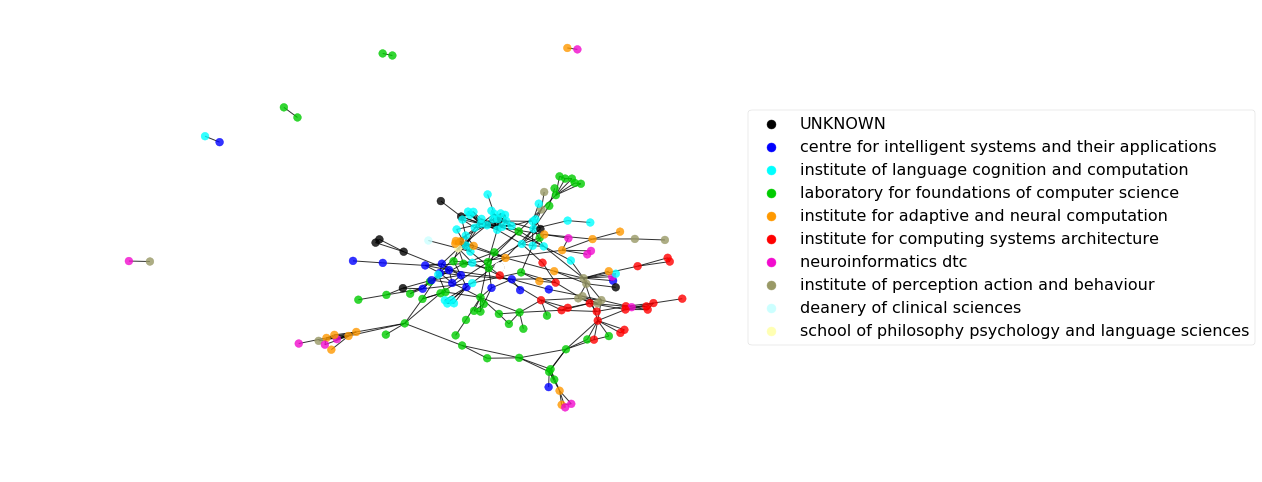

In [18]:
pos = nx.spring_layout(g_infnet6yr,k=10)
f = plt.figure(figsize=(12,8))
ax = f.add_subplot(111)
nx.draw(
    g_infnet6yr,
    node_size=60,
    ax=ax,
    alpha=.8,
    node_color=artist.color_by_inst(g_infnet6yr, lookup_poinf))
artist.add_inst_labels(ax,with_legend=True)

In [143]:
# Save as json file
import json
dat = nx.readwrite.json_graph.node_link_data(g_infnet6yr)
json.dump(dat, open('../../data/data_schoolofinf/json/infnet6yr.json','w'))

## community detection

### Girvan-newman method

In [19]:
best_partition_gn_infnet6yr , best_score = get_best_gnalgo(g_infnet6yr)

2018-04-08 12:41:47,613 : INFO : best_score: 0.253
2018-04-08 12:41:48,469 : INFO : best_score: 0.352
2018-04-08 12:41:48,752 : INFO : best_score: 0.458
2018-04-08 12:41:49,264 : INFO : best_score: 0.656
2018-04-08 12:41:49,302 : INFO : best_score: 0.671
2018-04-08 12:41:49,368 : INFO : best_score: 0.683
2018-04-08 12:41:49,400 : INFO : best_score: 0.690
2018-04-08 12:41:49,513 : INFO : best_score: 0.708
2018-04-08 12:41:49,564 : INFO : best_score: 0.717
2018-04-08 12:41:49,728 : INFO : best_score: 0.736
2018-04-08 12:41:49,808 : INFO : best_score: 0.755


In [20]:
print(best_score)

0.7546826681808765


In [21]:
pos_infnet6yr_spirng = nx.spring_layout(g_infnet6yr)

In [22]:
G_infnet6yr_gn = create_community_graph(best_partition_gn_infnet6yr, g_infnet6yr)  # create graph
pos_G_infnet6yr_gn = nx.spring_layout(G_infnet6yr_gn, k=.2, pos=pos_infnet6yr_spirng)  # create pos

In [23]:
a=set()
for i,j in best_partition_gn_infnet6yr.items():
    a.add(j)
print(a)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17}


### Modularity opitmisation

In [24]:
best_partition_mod_infnet6yr = community.best_partition(g_infnet6yr)
print(community.modularity(best_partition_mod_infnet6yr, g_infnet6yr))

0.756301747224162


In [25]:
G_infnet6yr_mod = create_community_graph(best_partition_mod_infnet6yr, g_infnet6yr)

In [26]:
a=set()
for i,j in best_partition_mod_infnet6yr.items():
    a.add(j)
print(a)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}


## Homophily

### by institute

In [106]:
edges_dict, mat, count_dict, attr_names = get_mixing_dict(
    g_infnet6yr,
    'institute',
    characteristic_type='attribute',target_order=inst_order)

In [107]:
res_prob, res_frac = pairwise_comparison(mat, attr_names, count_dict)

2018-04-08 13:25:49,463 : INFO : UNKNOWN(8) - centre for intelligent systems and their applications(18)
	within_i:4.0 within_j:25.0 btw_ij:3.0
	0.426 & 0.094
2018-04-08 13:25:49,464 : INFO : UNKNOWN(8) - institute of language cognition and computation(42)
	within_i:4.0 within_j:93.0 btw_ij:7.0
	0.269 & 0.067
2018-04-08 13:25:49,465 : INFO : UNKNOWN(8) - laboratory for foundations of computer science(49)
	within_i:4.0 within_j:55.0 btw_ij:1.0
	0.241 & 0.017
2018-04-08 13:25:49,466 : INFO : UNKNOWN(8) - institute for adaptive and neural computation(20)
	within_i:4.0 within_j:20.0 btw_ij:0.0
	0.408 & 0.000
2018-04-08 13:25:49,467 : INFO : UNKNOWN(8) - institute for computing systems architecture(21)
	within_i:4.0 within_j:32.0 btw_ij:0.0
	0.400 & 0.000
2018-04-08 13:25:49,467 : INFO : UNKNOWN(8) - neuroinformatics dtc(12)
	within_i:4.0 within_j:0.0 btw_ij:0.0
	0.480 & 0.000
2018-04-08 13:25:49,468 : INFO : UNKNOWN(8) - institute of perception action and behaviour(12)
	within_i:4.0 within_

2018-04-08 13:25:49,496 : INFO : institute for computing systems architecture(21) - institute of language cognition and computation(42)
	within_i:32.0 within_j:93.0 btw_ij:3.0
	0.444 & 0.023
2018-04-08 13:25:49,496 : INFO : institute for computing systems architecture(21) - laboratory for foundations of computer science(49)
	within_i:32.0 within_j:55.0 btw_ij:9.0
	0.420 & 0.094
2018-04-08 13:25:49,497 : INFO : institute for computing systems architecture(21) - institute for adaptive and neural computation(20)
	within_i:32.0 within_j:20.0 btw_ij:1.0
	0.500 & 0.019
2018-04-08 13:25:49,498 : INFO : institute for computing systems architecture(21) - neuroinformatics dtc(12)
	within_i:32.0 within_j:0.0 btw_ij:0.0
	0.463 & 0.000
2018-04-08 13:25:49,498 : INFO : institute for computing systems architecture(21) - institute of perception action and behaviour(12)
	within_i:32.0 within_j:11.0 btw_ij:4.0
	0.463 & 0.085
2018-04-08 13:25:49,499 : INFO : institute for computing systems architecture(2

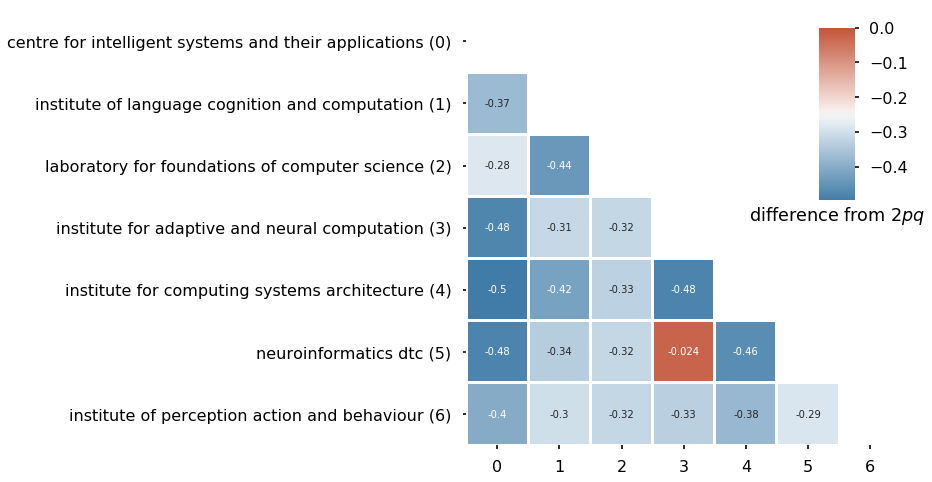

In [121]:
# element wise division with res_prob, s.t. if >= 1 then cross-edges more than expected
res = np.subtract(res_frac,res_prob)

f = plt.figure(figsize=(10,8))
ax= f.add_subplot(111)
cbar_ax = f.add_axes([0.7, .55, .05, .3])
cbar_ax.set_xlabel('difference from $2pq$')
ax = sns.heatmap(
    res[1:-2,1:-2],
    yticklabels=[x + " ({})".format(i) for i,x in enumerate(attr_names[1:-2])],
    cmap=sns.diverging_palette(240, 20, n=9, as_cmap=True),
    annot=True,
    linewidths=2,
#     center=0,
    square=True,
    ax=ax,
#     cbar=True,
    cbar_ax=cbar_ax,
    mask=np.triu(np.zeros_like(res_frac[1:-2,1:-2])==0),
    robust=True)
# f.tight_layout()

In [122]:
f.savefig('IMG/homo_inst_infnet6yr.pdf',format='pdf',bbox_inches='tight')

In [31]:
count_dict

{'UNKNOWN': 8,
 'centre for intelligent systems and their applications': 18,
 'deanery of clinical sciences': 1,
 'institute for adaptive and neural computation': 20,
 'institute for computing systems architecture': 21,
 'institute of language cognition and computation': 42,
 'institute of perception action and behaviour': 12,
 'laboratory for foundations of computer science': 49,
 'neuroinformatics dtc': 12,
 'school of philosophy psychology and language sciences': 1}

In [32]:
diff = one_vs_world(mat, attr_names, count_dict)

2018-04-08 12:41:53,514 : INFO : UNKNOWN within:4.0 outside:12.0
0.083 & 0.033
2018-04-08 12:41:53,515 : INFO : centre for intelligent systems and their applications within:25.0 outside:24.0
0.177 & 0.066
2018-04-08 12:41:53,515 : INFO : institute of language cognition and computation within:93.0 outside:52.0
0.352 & 0.144
2018-04-08 12:41:53,516 : INFO : laboratory for foundations of computer science within:55.0 outside:39.0
0.391 & 0.108
2018-04-08 12:41:53,517 : INFO : institute for adaptive and neural computation within:20.0 outside:47.0
0.194 & 0.130
2018-04-08 12:41:53,518 : INFO : institute for computing systems architecture within:32.0 outside:17.0
0.202 & 0.047
2018-04-08 12:41:53,518 : INFO : neuroinformatics dtc within:0.0 outside:20.0
0.122 & 0.055
2018-04-08 12:41:53,519 : INFO : institute of perception action and behaviour within:11.0 outside:21.0
0.122 & 0.058
2018-04-08 12:41:53,520 : INFO : deanery of clinical sciences within:0.0 outside:1.0
0.011 & 0.003
2018-04-08 12

In [33]:
for i in diff:
    print('{:.3f}'.format(i))

-0.050
-0.110
-0.208
-0.283
-0.064
-0.155
-0.067
-0.064
-0.008
0.014


In [34]:
np.mean(diff)

-0.09938648419376965

###  by node degree

In [197]:
# add degree info
nx.set_node_attributes(g_infnet6yr,dict(g_infnet6yr.degree),'degree')

In [195]:
edges_dict, mat, count_dict, attr_names = get_mixing_dict(
    g_infnet6yr,
    'degree',
    characteristic_type='degree')

In [203]:
degree__ = {}
for i,d in g_infnet6yr.nodes(data=True):
    if d['degree'] >=10:
        try:
            degree__[d['degree']].add(i)
        except KeyError:
            degree__[d['degree']] = set(list([i]))

In [204]:
degree__

{10: {'1b064412-0109-4090-a60f-bafcbbad74be',
  '1c6a1e04-4291-426e-a921-42be34ba8494'},
 11: {'d173bfd9-d693-428d-a61f-9ad70c4649d2',
  'f0e55345-3da8-451d-bd30-8b1068015efc',
  'f804a9ce-5cc1-456b-b652-a91c8e034c68'},
 12: {'2b36a690-b726-438e-8eb7-1128a7e7775d',
  '3dd7e2c0-ebc3-4ab7-918b-5bacb961ce91',
  '9cb66eca-0de2-438b-8896-9c5d6d748601'},
 17: {'570a3e8e-0e1c-4d8e-8cf5-8374bdc9a5c4'},
 18: {'3593b144-170a-4242-90cf-16ffbe82f45f'}}

In [213]:
df=[]
for i,k in degree__.items():
    df.append(lookup_poinf.loc[list(k)])
_df = pd.concat(df)

In [214]:
_df

,last_name,first_name,personal_url,position,parent,institute,full_name,institute_class,alias,first_pub_year,total_pub,total_pub_1997,total_pub_2012,pub_ids
id,,,,,,,,,,,,,,
9cb66eca-0de2-438b-8896-9c5d6d748601,moore,johanna,http://www.research.ed.ac.uk/portal/en/persons...,chair of artificial intelligence and head of s...,school of informatics,institute of language cognition and computation,moore johanna,2,"moore, j. d.|moore, j.|d. moore, j.",2009.0,168,134,26,"{66a493cc-a626-40b5-93cd-08a49287691a, 9a27a67..."
3dd7e2c0-ebc3-4ab7-918b-5bacb961ce91,sennrich,rico,http://www.research.ed.ac.uk/portal/en/persons...,lecturer in machine learning,school of informatics,institute of language cognition and computation,sennrich rico,2,"sennrich, r.",2011.0,52,52,38,"{90e29f37-7292-4240-8d06-27f544ef8a69, dbec704..."
2b36a690-b726-438e-8eb7-1128a7e7775d,ramamoorthy,ram,http://www.research.ed.ac.uk/portal/en/persons...,reader,school of informatics,institute of perception action and behaviour,ramamoorthy ram,7,"ramamoorthy, s.|ramamoorthy, r.",2014.0,79,79,52,"{b795e67a-3980-48e5-be62-ecb2cc70a24c, c02079a..."
570a3e8e-0e1c-4d8e-8cf5-8374bdc9a5c4,bell,peter,http://www.research.ed.ac.uk/portal/en/persons...,senior researcher,school of informatics,institute of language cognition and computation,bell peter,2,"bell, p.|bell, p. j.",2015.0,49,49,44,"{66db19fe-be0d-44c5-b2cb-8158c1f3815e, a960d96..."
3593b144-170a-4242-90cf-16ffbe82f45f,renals,steve,http://www.research.ed.ac.uk/portal/en/persons...,chair of speech technology,school of informatics,institute of language cognition and computation,renals steve,2,"renals, s. (ed.)|renals, s.|renals, s. j.",2015.0,199,198,87,"{66a493cc-a626-40b5-93cd-08a49287691a, 66db19f..."
1c6a1e04-4291-426e-a921-42be34ba8494,cheney,james,http://www.research.ed.ac.uk/portal/en/persons...,reader,school of informatics,laboratory for foundations of computer science,cheney james,3,"cheney, j. (ed.)|cheney, j.|cheney, j. r.",2009.0,127,126,51,"{209af60b-9309-4fc8-97da-b696812287fb, 144a644..."
1b064412-0109-4090-a60f-bafcbbad74be,kilgour,jonathan,http://www.research.ed.ac.uk/portal/en/persons...,research fellow,school of informatics,institute of language cognition and computation,kilgour jonathan,2,"kilgour, j.",2008.0,22,22,4,"{8379f9f9-0979-494a-96f8-48f0651809ca, e86b48f..."
f804a9ce-5cc1-456b-b652-a91c8e034c68,birch,alexandra,http://www.research.ed.ac.uk/portal/en/persons...,senior researcher,school of informatics,institute of language cognition and computation,birch alexandra,2,"birch-mayne, a.|birch, a.",2013.0,31,31,19,"{22636f47-d217-4cd0-87ef-4042ce0cfd64, cfb167d..."
d173bfd9-d693-428d-a61f-9ad70c4649d2,germann,ulrich,http://www.research.ed.ac.uk/portal/en/persons...,senior researcher,school of informatics,institute of language cognition and computation,germann ulrich,2,"germann, u.",2017.0,26,26,16,"{fe766d2e-c50a-42b2-8a5a-10c0f711d14b, 6ca5998..."


In [140]:
target_order = sorted(attr_names)

In [141]:
edges_dict, mat, count_dict, attr_names = get_mixing_dict(
    g_infnet6yr,
    'degree',
    characteristic_type='degree', target_order=target_order)

In [142]:
attr_names_degree_infnet6yr = attr_names
diff_degree_infnet6yr = one_vs_world(mat,attr_names,count_dict)

2018-04-08 14:04:33,514 : INFO : 1 within:5.0 outside:28.0
0.328 & 0.078
2018-04-08 14:04:33,515 : INFO : 2 within:5.0 outside:64.0
0.321 & 0.177
2018-04-08 14:04:33,516 : INFO : 3 within:5.0 outside:65.0
0.235 & 0.180
2018-04-08 14:04:33,517 : INFO : 4 within:14.0 outside:60.0
0.211 & 0.166
2018-04-08 14:04:33,517 : INFO : 5 within:5.0 outside:70.0
0.159 & 0.194
2018-04-08 14:04:33,518 : INFO : 6 within:10.0 outside:118.0
0.219 & 0.327
2018-04-08 14:04:33,519 : INFO : 7 within:0.0 outside:21.0
0.032 & 0.058
2018-04-08 14:04:33,519 : INFO : 8 within:1.0 outside:46.0
0.063 & 0.127
2018-04-08 14:04:33,520 : INFO : 9 within:1.0 outside:34.0
0.043 & 0.094
2018-04-08 14:04:33,520 : INFO : 10 within:0.0 outside:20.0
0.022 & 0.055
2018-04-08 14:04:33,521 : INFO : 11 within:3.0 outside:27.0
0.032 & 0.075
2018-04-08 14:04:33,522 : INFO : 12 within:0.0 outside:36.0
0.032 & 0.100
2018-04-08 14:04:33,522 : INFO : 17 within:0.0 outside:17.0
0.011 & 0.047
2018-04-08 14:04:33,523 : INFO : 18 within:0

In [143]:
for i in diff:
    print('{:.3f}'.format(i))

-0.250
-0.144
-0.055
-0.044
0.035
0.108
0.026
0.064
0.052
0.034
0.043
0.068
0.036
0.039


In [144]:
np.mean(diff)

0.0008295100999937877

In [132]:
res_prob, res_frac = pairwise_comparison(mat,attr_names,count_dict)

2018-04-08 14:00:26,293 : INFO : 1(38) - 2(37)
	within_i:5.0 within_j:5.0 btw_ij:5.0
	0.500 & 0.333
2018-04-08 14:00:26,294 : INFO : 1(38) - 3(25)
	within_i:5.0 within_j:5.0 btw_ij:2.0
	0.479 & 0.167
2018-04-08 14:00:26,294 : INFO : 1(38) - 4(22)
	within_i:5.0 within_j:14.0 btw_ij:2.0
	0.464 & 0.095
2018-04-08 14:00:26,295 : INFO : 1(38) - 5(16)
	within_i:5.0 within_j:5.0 btw_ij:4.0
	0.417 & 0.286
2018-04-08 14:00:26,296 : INFO : 1(38) - 6(23)
	within_i:5.0 within_j:10.0 btw_ij:8.0
	0.470 & 0.348
2018-04-08 14:00:26,296 : INFO : 1(38) - 7(3)
	within_i:5.0 within_j:0.0 btw_ij:2.0
	0.136 & 0.286
2018-04-08 14:00:26,297 : INFO : 1(38) - 8(6)
	within_i:5.0 within_j:1.0 btw_ij:2.0
	0.236 & 0.250
2018-04-08 14:00:26,298 : INFO : 1(38) - 9(4)
	within_i:5.0 within_j:1.0 btw_ij:1.0
	0.172 & 0.143
2018-04-08 14:00:26,298 : INFO : 1(38) - 10(2)
	within_i:5.0 within_j:0.0 btw_ij:0.0
	0.095 & 0.000
2018-04-08 14:00:26,299 : INFO : 1(38) - 11(3)
	within_i:5.0 within_j:3.0 btw_ij:0.0
	0.136 & 0.000
2

2018-04-08 14:00:26,339 : INFO : 7(3) - 5(16)
	within_i:0.0 within_j:5.0 btw_ij:2.0
	0.266 & 0.286
2018-04-08 14:00:26,340 : INFO : 7(3) - 6(23)
	within_i:0.0 within_j:10.0 btw_ij:3.0
	0.204 & 0.231
2018-04-08 14:00:26,340 : INFO : 7(3) - 8(6)
	within_i:0.0 within_j:1.0 btw_ij:2.0
	0.444 & 0.667
2018-04-08 14:00:26,341 : INFO : 7(3) - 9(4)
	within_i:0.0 within_j:1.0 btw_ij:2.0
	0.490 & 0.667
2018-04-08 14:00:26,341 : INFO : 7(3) - 10(2)
	within_i:0.0 within_j:0.0 btw_ij:1.0
	0.480 & 1.000
2018-04-08 14:00:26,342 : INFO : 7(3) - 11(3)
	within_i:0.0 within_j:3.0 btw_ij:3.0
	0.500 & 0.500
2018-04-08 14:00:26,342 : INFO : 7(3) - 12(3)
	within_i:0.0 within_j:0.0 btw_ij:2.0
	0.500 & 1.000
2018-04-08 14:00:26,343 : INFO : 7(3) - 17(1)
	within_i:0.0 within_j:0.0 btw_ij:1.0
	0.375 & 1.000
2018-04-08 14:00:26,343 : INFO : 7(3) - 18(1)
	within_i:0.0 within_j:0.0 btw_ij:1.0
	0.375 & 1.000
2018-04-08 14:00:26,344 : INFO : 8(6) - 1(38)
	within_i:1.0 within_j:5.0 btw_ij:2.0
	0.236 & 0.250
2018-04-08 

2018-04-08 14:00:26,378 : INFO : 17(1) - 10(2)
	within_i:0.0 within_j:0.0 btw_ij:1.0
	0.444 & 1.000
2018-04-08 14:00:26,379 : INFO : 17(1) - 11(3)
	within_i:0.0 within_j:3.0 btw_ij:3.0
	0.375 & 0.500
2018-04-08 14:00:26,379 : INFO : 17(1) - 12(3)
	within_i:0.0 within_j:0.0 btw_ij:2.0
	0.375 & 1.000
2018-04-08 14:00:26,379 : INFO : 17(1) - 18(1)
	within_i:0.0 within_j:0.0 btw_ij:1.0
	0.500 & 1.000
2018-04-08 14:00:26,380 : INFO : 18(1) - 1(38)
	within_i:0.0 within_j:5.0 btw_ij:0.0
	0.050 & 0.000
2018-04-08 14:00:26,380 : INFO : 18(1) - 2(37)
	within_i:0.0 within_j:5.0 btw_ij:2.0
	0.051 & 0.286
2018-04-08 14:00:26,381 : INFO : 18(1) - 3(25)
	within_i:0.0 within_j:5.0 btw_ij:0.0
	0.074 & 0.000
2018-04-08 14:00:26,381 : INFO : 18(1) - 4(22)
	within_i:0.0 within_j:14.0 btw_ij:4.0
	0.083 & 0.222
2018-04-08 14:00:26,382 : INFO : 18(1) - 5(16)
	within_i:0.0 within_j:5.0 btw_ij:0.0
	0.111 & 0.000
2018-04-08 14:00:26,382 : INFO : 18(1) - 6(23)
	within_i:0.0 within_j:10.0 btw_ij:2.0
	0.080 & 0.16

In [133]:
res  = np.subtract(res_frac,res_prob)

/afs/inf.ed.ac.uk/user/s14/s1450710/miniconda3/envs/infnet3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(117.86,0.5,'node degrees')

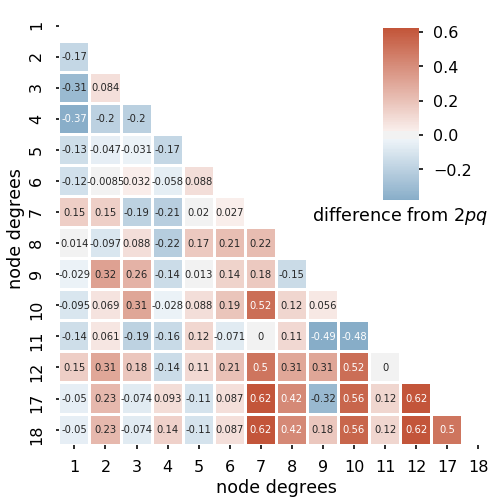

In [134]:
f = plt.figure(figsize=(10,8))
ax= f.add_subplot(111)
ax = f.add_subplot(111)
cbar_ax = f.add_axes([.66, .55, .05, .3])
cbar_ax.set_xlabel('difference from $2pq$')
ax = sns.heatmap(
    res,
    yticklabels=attr_names,
    xticklabels=attr_names,
    cmap=sns.diverging_palette(240, 20, n=9, as_cmap=True),
    annot=True,
    linewidths=2,
    square=True,
    center=0,
    ax=ax,
    cbar=True,
    cbar_ax=cbar_ax,
    mask=np.triu(np.zeros_like(res_frac)==0),
    robust=True)
ax.set_xlabel('node degrees')
ax.set_ylabel('node degrees')

In [45]:
f.savefig('IMG/homo_degree_infnet6yr.pdf',format='pdf',bbox_inches='tight')

## infnet6yr- community detection

use mod network since its high...

### by inst

In [74]:
edges_dict, mat, count_dict, attr_names = get_mixing_dict(
    G_infnet6yr_mod, characteristic_name='institute', target_order=inst_order)

In [75]:
# 1 vs world:
diff = one_vs_world(mat, attr_names, count_dict)

2018-04-08 12:50:19,959 : INFO : UNKNOWN within:4.0 outside:11.0
0.083 & 0.035
2018-04-08 12:50:19,960 : INFO : centre for intelligent systems and their applications within:23.0 outside:15.0
0.177 & 0.048
2018-04-08 12:50:19,961 : INFO : institute of language cognition and computation within:79.0 outside:45.0
0.352 & 0.143
2018-04-08 12:50:19,962 : INFO : laboratory for foundations of computer science within:49.0 outside:31.0
0.391 & 0.099
2018-04-08 12:50:19,962 : INFO : institute for adaptive and neural computation within:18.0 outside:44.0
0.194 & 0.140
2018-04-08 12:50:19,963 : INFO : institute for computing systems architecture within:29.0 outside:12.0
0.202 & 0.038
2018-04-08 12:50:19,964 : INFO : neuroinformatics dtc within:0.0 outside:20.0
0.122 & 0.064
2018-04-08 12:50:19,964 : INFO : institute of perception action and behaviour within:11.0 outside:16.0
0.122 & 0.051
2018-04-08 12:50:19,965 : INFO : deanery of clinical sciences within:0.0 outside:1.0
0.011 & 0.003
2018-04-08 12

In [76]:
for d in diff:
    print('{:.3f}'.format(d))

-0.048
-0.129
-0.209
-0.292
-0.054
-0.164
-0.058
-0.071
-0.008
0.011


In [49]:
np.mean(diff)

-0.10209128508301926

In [50]:
# pairwise
res_prob, res_frac = pairwise_comparison(mat, attr_names, count_dict)

2018-04-08 12:41:54,721 : INFO : UNKNOWN(8) - centre for intelligent systems and their applications(18)
	within_i:4.0 within_j:23.0 btw_ij:3.0
	0.426 & 0.100
2018-04-08 12:41:54,722 : INFO : UNKNOWN(8) - institute of language cognition and computation(42)
	within_i:4.0 within_j:79.0 btw_ij:6.0
	0.269 & 0.067
2018-04-08 12:41:54,723 : INFO : UNKNOWN(8) - laboratory for foundations of computer science(49)
	within_i:4.0 within_j:49.0 btw_ij:1.0
	0.241 & 0.019
2018-04-08 12:41:54,724 : INFO : UNKNOWN(8) - institute for adaptive and neural computation(20)
	within_i:4.0 within_j:18.0 btw_ij:0.0
	0.408 & 0.000
2018-04-08 12:41:54,724 : INFO : UNKNOWN(8) - institute for computing systems architecture(21)
	within_i:4.0 within_j:29.0 btw_ij:0.0
	0.400 & 0.000
2018-04-08 12:41:54,725 : INFO : UNKNOWN(8) - neuroinformatics dtc(12)
	within_i:4.0 within_j:0.0 btw_ij:0.0
	0.480 & 0.000
2018-04-08 12:41:54,726 : INFO : UNKNOWN(8) - institute of perception action and behaviour(12)
	within_i:4.0 within_

2018-04-08 12:41:54,750 : INFO : institute for computing systems architecture(21) - institute of language cognition and computation(42)
	within_i:29.0 within_j:79.0 btw_ij:3.0
	0.444 & 0.027
2018-04-08 12:41:54,751 : INFO : institute for computing systems architecture(21) - laboratory for foundations of computer science(49)
	within_i:29.0 within_j:49.0 btw_ij:7.0
	0.420 & 0.082
2018-04-08 12:41:54,752 : INFO : institute for computing systems architecture(21) - institute for adaptive and neural computation(20)
	within_i:29.0 within_j:18.0 btw_ij:1.0
	0.500 & 0.021
2018-04-08 12:41:54,752 : INFO : institute for computing systems architecture(21) - neuroinformatics dtc(12)
	within_i:29.0 within_j:0.0 btw_ij:0.0
	0.463 & 0.000
2018-04-08 12:41:54,753 : INFO : institute for computing systems architecture(21) - institute of perception action and behaviour(12)
	within_i:29.0 within_j:11.0 btw_ij:1.0
	0.463 & 0.024
2018-04-08 12:41:54,753 : INFO : institute for computing systems architecture(2

In [51]:
res = np.subtract(res_frac, res_prob)

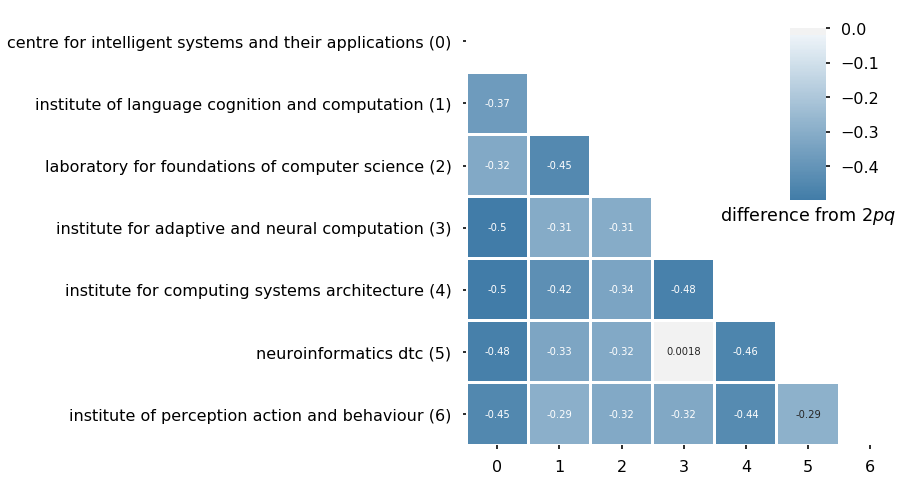

In [52]:
f = plt.figure(figsize=(10, 8))
ax = f.add_subplot(111)
cbar_ax = f.add_axes([.66, .55, .05, .3])
cbar_ax.set_xlabel('difference from $2pq$')
ax = sns.heatmap(
    res[1:-2, 1:-2],
    yticklabels=[
        "{} ({})".format(x, i) for i, x in enumerate(attr_names[1:-2])
    ],
    cmap=sns.diverging_palette(240, 20, n=9, as_cmap=True),
    annot=True,
    linewidths=2,
    square=True,
    ax=ax,
    cbar_ax=cbar_ax,
    center=0,
    mask=np.triu(np.zeros_like(res_frac[1:-2, 1:-2]) == 0),
    robust=True)

In [53]:
f.savefig('IMG/homo_inst_topicnet6yr.pdf', format='pdf', bbox_inches='tight')

### by degree

In [145]:
# add degrees to edges
nx.set_node_attributes(
    G_infnet6yr_mod, dict(G_infnet6yr_mod.degree), name='degree')
edges_dict, mat, count_dict, attr_names = get_mixing_dict(
    G_infnet6yr_mod, characteristic_name='degree')
target_order=sorted(attr_names)
edges_dict, mat, count_dict, attr_names = get_mixing_dict(
    G_infnet6yr_mod, characteristic_name='degree',target_order=target_order)

In [146]:
# 1 vs world:
diff = one_vs_world(mat, attr_names, count_dict)

2018-04-08 14:05:34,898 : INFO : 1 within:5.0 outside:32.0
0.352 & 0.102
2018-04-08 14:05:34,899 : INFO : 2 within:10.0 outside:70.0
0.370 & 0.223
2018-04-08 14:05:34,900 : INFO : 3 within:5.0 outside:56.0
0.211 & 0.178
2018-04-08 14:05:34,901 : INFO : 4 within:18.0 outside:76.0
0.258 & 0.242
2018-04-08 14:05:34,902 : INFO : 5 within:6.0 outside:73.0
0.168 & 0.232
2018-04-08 14:05:34,902 : INFO : 6 within:8.0 outside:62.0
0.131 & 0.197
2018-04-08 14:05:34,903 : INFO : 7 within:2.0 outside:31.0
0.053 & 0.099
2018-04-08 14:05:34,904 : INFO : 8 within:0.0 outside:32.0
0.043 & 0.102
2018-04-08 14:05:34,905 : INFO : 9 within:0.0 outside:18.0
0.022 & 0.057
2018-04-08 14:05:34,905 : INFO : 10 within:1.0 outside:28.0
0.032 & 0.089
2018-04-08 14:05:34,906 : INFO : 11 within:0.0 outside:11.0
0.011 & 0.035
2018-04-08 14:05:34,907 : INFO : 14 within:0.0 outside:14.0
0.011 & 0.045
2018-04-08 14:05:34,907 : INFO : 15 within:0.0 outside:15.0
0.011 & 0.048


In [147]:
attr_names_degree_infnet6yr_mod = attr_names
diff_degree_infnet6yr_mod = diff

In [148]:
np.mean(diff_degree_infnet6yr_mod)

-0.001627667782111322

In [59]:
# pairwise
res_prob, res_frac = pairwise_comparison(mat, attr_names, count_dict)

2018-04-08 12:43:29,909 : INFO : 1(42) - 2(45)
	within_i:5.0 within_j:10.0 btw_ij:6.0
	0.499 & 0.286
2018-04-08 12:43:29,910 : INFO : 1(42) - 3(22)
	within_i:5.0 within_j:5.0 btw_ij:3.0
	0.451 & 0.231
2018-04-08 12:43:29,911 : INFO : 1(42) - 4(28)
	within_i:5.0 within_j:18.0 btw_ij:9.0
	0.480 & 0.281
2018-04-08 12:43:29,912 : INFO : 1(42) - 5(17)
	within_i:5.0 within_j:6.0 btw_ij:5.0
	0.410 & 0.312
2018-04-08 12:43:29,912 : INFO : 1(42) - 6(13)
	within_i:5.0 within_j:8.0 btw_ij:2.0
	0.361 & 0.133
2018-04-08 12:43:29,913 : INFO : 1(42) - 7(5)
	within_i:5.0 within_j:2.0 btw_ij:2.0
	0.190 & 0.222
2018-04-08 12:43:29,914 : INFO : 1(42) - 8(4)
	within_i:5.0 within_j:0.0 btw_ij:2.0
	0.159 & 0.286
2018-04-08 12:43:29,915 : INFO : 1(42) - 9(2)
	within_i:5.0 within_j:0.0 btw_ij:1.0
	0.087 & 0.167
2018-04-08 12:43:29,915 : INFO : 1(42) - 10(3)
	within_i:5.0 within_j:1.0 btw_ij:2.0
	0.124 & 0.250
2018-04-08 12:43:29,916 : INFO : 1(42) - 11(1)
	within_i:5.0 within_j:0.0 btw_ij:0.0
	0.045 & 0.000
2

2018-04-08 12:43:29,963 : INFO : 7(5) - 14(1)
	within_i:2.0 within_j:0.0 btw_ij:1.0
	0.278 & 0.333
2018-04-08 12:43:29,963 : INFO : 7(5) - 15(1)
	within_i:2.0 within_j:0.0 btw_ij:1.0
	0.278 & 0.333
2018-04-08 12:43:29,964 : INFO : 8(4) - 1(42)
	within_i:0.0 within_j:5.0 btw_ij:2.0
	0.159 & 0.286
2018-04-08 12:43:29,964 : INFO : 8(4) - 2(45)
	within_i:0.0 within_j:10.0 btw_ij:2.0
	0.150 & 0.167
2018-04-08 12:43:29,965 : INFO : 8(4) - 3(22)
	within_i:0.0 within_j:5.0 btw_ij:1.0
	0.260 & 0.167
2018-04-08 12:43:29,966 : INFO : 8(4) - 4(28)
	within_i:0.0 within_j:18.0 btw_ij:6.0
	0.219 & 0.250
2018-04-08 12:43:29,966 : INFO : 8(4) - 5(17)
	within_i:0.0 within_j:6.0 btw_ij:4.0
	0.308 & 0.400
2018-04-08 12:43:29,967 : INFO : 8(4) - 6(13)
	within_i:0.0 within_j:8.0 btw_ij:7.0
	0.360 & 0.467
2018-04-08 12:43:29,967 : INFO : 8(4) - 7(5)
	within_i:0.0 within_j:2.0 btw_ij:3.0
	0.494 & 0.600
2018-04-08 12:43:29,968 : INFO : 8(4) - 9(2)
	within_i:0.0 within_j:0.0 btw_ij:2.0
	0.444 & 1.000
2018-04-08

In [60]:
res = np.subtract(res_frac, res_prob)

Text(0.5,38.3,'node degrees')

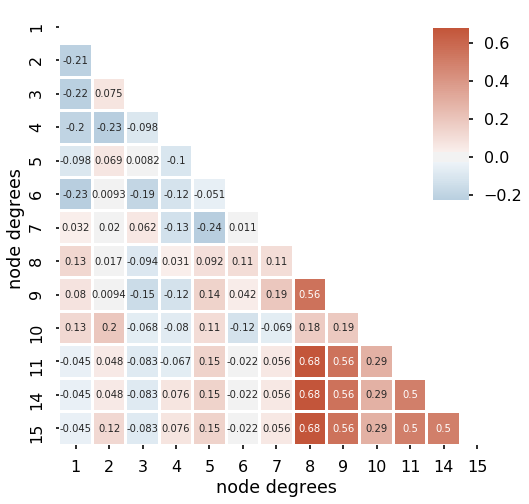

In [61]:
f = plt.figure(figsize=(10, 8))
ax = f.add_subplot(111)
cbar_ax = f.add_axes([.73, .55, .05, .3])
ax = sns.heatmap(
    res,
    yticklabels=attr_names,
    xticklabels=attr_names,
    cmap=sns.diverging_palette(240, 20, n=9, as_cmap=True),
    annot=True,
    linewidths=2,
    square=True,
    ax=ax,
    center=0,
    cbar_ax=cbar_ax,
#     cbar=False,
    mask=np.triu(np.zeros_like(res_frac) == 0),
    robust=True)
ax.set_ylabel('node degrees')
ax.set_xlabel('node degrees')

In [63]:
f.savefig('IMG/homo_degree_topicnet6yMODr.pdf', format='pdf', bbox_inches='tight')

---

# `infnet6yr(w)`

In [ ]:
with open(
        '../../data/data_schoolofinf/poinf_collabgraph_2012-2017_weighted.txt',
        'r') as f:
    x = f.readlines()

infnet6yrw_nodeorder = [s.strip() for s in x]

In [ ]:
infnet6yrw_adjmat = np.load(
    '../../data/data_schoolofinf/mat/infnet6yrs-weighted-adj-mat.order6yr.pkl')

In [ ]:
g_infnet6yr_w = adj_mat_to_graph(
    infnet6yrw_adjmat, infnet6yrw_nodeorder, weighted=True)

In [ ]:
print((nx.info(g_infnet6yr_w)))

In [ ]:
# Additional attributes
nx.set_node_attributes(g_infnet6yr_w, lookup_poinf.loc[list(
    g_infnet6yr_w.nodes)]['full_name'].to_dict(), 'name')
nx.set_node_attributes(g_infnet6yr_w, lookup_poinf.loc[list(
    g_infnet6yr_w.nodes)]['institute'].to_dict(), 'institute')
nx.set_node_attributes(g_infnet6yr_w, lookup_poinf.loc[list(
    g_infnet6yr_w.nodes)]['position'].to_dict(), 'position')
nx.set_node_attributes(g_infnet6yr_w, lookup_poinf.loc[list(
    g_infnet6yr_w.nodes)]['first_pub_year'].to_dict(), 'year')

## Community detection

### Girvan-Newman method

In [ ]:
def get_best_gnalgo_w(g):
    
    def weighted_edge_betweeness(g):
        _dict =  nx.algorithms.centrality.edge_betweenness_centrality(g, k=len(g), weight='weight')
        highest = 0
        edge = None
        for (a,b) in _dict.items():
            if b >highest:
                highest=b
                edge =a
        logging.info('{}: {}'.format(highest,edge))
        return edge
        
    comm = nx.community.girvan_newman(g,most_valuable_edge=weighted_edge_betweeness)
    states=[]
    scores = []
    best_score = 0    
    best_partition = None
    # starting state:
    _g = g
    org_g = g
    for partition in comm:
        _partition = convert_to_dict(partition)
        _score = community.modularity(_partition, _g) 
        # compute score based on previous induced graph
        states.append(_partition)
        scores.append(_score)
        
        if _score > best_score:
            best_score = _score
            best_partition = _partition
            logging.info('best_score: {:.3f}'.format(best_score))
        
    return best_partition, best_score

In [ ]:
best_partition_gn_infnet6yr_w , best_score = get_best_gnalgo_w(g_infnet6yr_w)

In [ ]:
print(best_score)

In [ ]:
G_infnet6yr_w_gn = create_community_graph(best_partition_gn_infnet6yr_w, g_infnet6yr_w)  # create graph

In [ ]:
print(nx.info(G_infnet6yr_gn))

In [ ]:
a=set()
for i,j in best_partition_mod_infnet6yr.items():
    a.add(j)
print(a)

### Modularity opitmisation

In [ ]:
best_partition_mod_infnet6yr_w = community.best_partition(g_infnet6yr_w)
print(community.modularity(best_partition_mod_infnet6yr_w, g_infnet6yr_w))

In [ ]:
a=set()
for i,j in best_partition_mod_infnet6yr_w.items():
    a.add(j)
print(a)

In [ ]:
G_infnet6yr_w_mod = create_community_graph(best_partition_mod_infnet6yr_w, g_infnet6yr_w)
print(nx.info(G_infnet6yr_w_mod))

----

# `topicnet6yr`

In [77]:
# load network using adjmat
with open('../../data/data_schoolofinf/poinf_collabgraph_2012-2017.txt') as f:
    nodeorder_6yr = [a.strip() for a in f.readlines()]

In [78]:
adjmat_topicnet6yr = pkl.load(
    open('../../embedding/notebooks/res/topicnet6yr_adjmat.pkl', 'rb'))

In [79]:
g_topicnet6yr = adj_mat_to_graph(adjmat_topicnet6yr, nodeorder_6yr)

In [80]:
# add node attributes:
nx.set_node_attributes(g_topicnet6yr, lookup_poinf.loc[list(
    g_topicnet6yr.nodes)]['full_name'].to_dict(), 'name')
nx.set_node_attributes(g_topicnet6yr, lookup_poinf.loc[list(
    g_topicnet6yr.nodes)]['institute'].to_dict(), 'institute')
nx.set_node_attributes(g_topicnet6yr, lookup_poinf.loc[list(
    g_topicnet6yr.nodes)]['position'].to_dict(), 'position')
nx.set_node_attributes(g_topicnet6yr, lookup_poinf.loc[list(
    g_topicnet6yr.nodes)]['first_pub_year'].to_dict(), 'year')

In [81]:
print(nx.info(g_topicnet6yr))

Name: 
Type: Graph
Number of nodes: 152
Number of edges: 361
Average degree:   4.7500


---

In [ ]:
count=0
for n in g_infnet6yr:
    if n in g_topicnet6yr:
        pass
    else:
        count+=1
print(count)

In [ ]:
# add nodes that are in infnet6yr but not in topicnet6yr - just for sake of comparison
topicnet6yr_mod = g_topicnet6yr.copy()

In [ ]:
for n in g_infnet6yr:
    if n in g_topicnet6yr:
        pass
    else:
        topicnet6yr_mod.add_node(n)

In [ ]:
print(nx.info(topicnet6yr_mod))

In [ ]:
pos_topicnet6yr = nx.spring_layout(g_infnet6yr, k=1)
pos_topicnet6yr = nx.spring_layout(topicnet6yr_mod, pos=pos_topicnet6yr, k=.2)

In [ ]:
f = plt.figure(figsize=(18,8))
ax1 = f.add_subplot(121)
nx.draw(
    g_infnet6yr,
    pos_topicnet6yr,
    node_size=50,
    alpha=.5,
    ax=ax1,
    node_color=artist.color_by_inst(g_infnet6yr, lookup_poinf))
ax2 = f.add_subplot(122)
nx.draw(
    g_topicnet6yr,
    pos_topicnet6yr,
    node_size=50,
    alpha=.5,
    ax=ax2,
    node_color=artist.color_by_inst(topicnet6yr_mod, lookup_poinf))

In [ ]:
f.savefig('IMG/infet6yrVStopicnet6yr.png', format='png',bbox_inches='tight')

## Community detection

- Does topicnet need further community detection?
- one though is to go from topic similarity matrix all the way to clustered network using eigenvector clustering

### Girvan-newman method

In [82]:
best_partition_gn_topicnet6yr, best_score = get_best_gnalgo(g_topicnet6yr)

2018-04-08 12:52:11,186 : INFO : best_score: 0.848


In [83]:
G_topicnet6yr_gn = create_community_graph(best_partition_gn_topicnet6yr,
                                          g_topicnet6yr)

### Modularity maximisation

In [84]:
best_partition_mod_topicnet6yr = community.best_partition(g_topicnet6yr)
print((community.modularity(best_partition_mod_topicnet6yr, g_topicnet6yr)))

0.8509027708504389


In [85]:
G_topicnet6yr_mod = create_community_graph(best_partition_mod_topicnet6yr,
                                           g_topicnet6yr)

In [ ]:
f = plt.figure(figsize=(18, 6))
ax1 = f.add_subplot(131)
nx.draw(
    G_topicnet6yr_gn,
    pos_topicnet6yr,
    ax=ax1,
    node_size=50,
    node_color=artist.color_by_comm(best_partition_gn_topicnet6yr,
                                    G_topicnet6yr_gn.node),
    alpha=.5)
ax2 = f.add_subplot(132)
nx.draw(
    g_topicnet6yr,
    pos_topicnet6yr,
    ax=ax2,
    node_size=50,
    node_color=artist.color_by_inst(g_topicnet6yr, lookup_poinf),
    alpha=.5)

ax3 = f.add_subplot(133)
nx.draw(
    G_topicnet6yr_mod,
    pos_topicnet6yr,
    ax=ax3,
    node_size=50,
    node_color=artist.color_by_comm(best_partition_mod_topicnet6yr,
                                    G_topicnet6yr_mod.node),
    alpha=.5)

f.tight_layout()

## Homophily

### by inst

In [161]:
edges_dict, mat, count_dict, attr_names = get_mixing_dict(
    g_topicnet6yr, characteristic_name='institute', target_order=inst_order)

In [162]:
# 1 vs world:
attr_names_degree_topicnet6yr = attr_names
diff_degree_topicneref6yr = one_vs_world(mat, attr_names, count_dict)

2018-04-08 14:12:39,923 : INFO : UNKNOWN within:4.0 outside:18.0
0.100 & 0.050
2018-04-08 14:12:39,924 : INFO : centre for intelligent systems and their applications within:4.0 outside:20.0
0.156 & 0.055
2018-04-08 14:12:39,925 : INFO : institute of language cognition and computation within:84.0 outside:31.0
0.361 & 0.086
2018-04-08 14:12:39,926 : INFO : laboratory for foundations of computer science within:44.0 outside:30.0
0.388 & 0.083
2018-04-08 14:12:39,926 : INFO : institute for adaptive and neural computation within:22.0 outside:55.0
0.188 & 0.152
2018-04-08 14:12:39,927 : INFO : institute for computing systems architecture within:58.0 outside:18.0
0.229 & 0.050
2018-04-08 14:12:39,928 : INFO : neuroinformatics dtc within:15.0 outside:49.0
0.111 & 0.136
2018-04-08 14:12:39,929 : INFO : institute of perception action and behaviour within:8.0 outside:14.0
0.100 & 0.039
2018-04-08 14:12:39,929 : INFO : deanery of clinical sciences within:0.0 outside:3.0
0.013 & 0.008
2018-04-08 14:

In [88]:
for i in diff:
    print('{:.3f}'.format(i))

-0.050
-0.101
-0.276
-0.305
-0.036
-0.179
0.024
-0.061
-0.005
0.004


In [89]:
np.mean(diff)

-0.09837257617728531

In [90]:
# pairwise
res_prob, res_frac = pairwise_comparison(mat, attr_names, count_dict)

2018-04-08 12:52:25,403 : INFO : UNKNOWN(8) - centre for intelligent systems and their applications(13)
	within_i:4.0 within_j:4.0 btw_ij:1.0
	0.472 & 0.111
2018-04-08 12:52:25,404 : INFO : UNKNOWN(8) - institute of language cognition and computation(36)
	within_i:4.0 within_j:84.0 btw_ij:15.0
	0.298 & 0.146
2018-04-08 12:52:25,405 : INFO : UNKNOWN(8) - laboratory for foundations of computer science(40)
	within_i:4.0 within_j:44.0 btw_ij:0.0
	0.278 & 0.000
2018-04-08 12:52:25,406 : INFO : UNKNOWN(8) - institute for adaptive and neural computation(16)
	within_i:4.0 within_j:22.0 btw_ij:0.0
	0.444 & 0.000
2018-04-08 12:52:25,406 : INFO : UNKNOWN(8) - institute for computing systems architecture(20)
	within_i:4.0 within_j:58.0 btw_ij:0.0
	0.408 & 0.000
2018-04-08 12:52:25,407 : INFO : UNKNOWN(8) - neuroinformatics dtc(9)
	within_i:4.0 within_j:15.0 btw_ij:0.0
	0.498 & 0.000
2018-04-08 12:52:25,408 : INFO : UNKNOWN(8) - institute of perception action and behaviour(8)
	within_i:4.0 within_j

2018-04-08 12:52:25,435 : INFO : institute for computing systems architecture(20) - institute of language cognition and computation(36)
	within_i:58.0 within_j:84.0 btw_ij:0.0
	0.459 & 0.000
2018-04-08 12:52:25,436 : INFO : institute for computing systems architecture(20) - laboratory for foundations of computer science(40)
	within_i:58.0 within_j:44.0 btw_ij:17.0
	0.444 & 0.143
2018-04-08 12:52:25,436 : INFO : institute for computing systems architecture(20) - institute for adaptive and neural computation(16)
	within_i:58.0 within_j:22.0 btw_ij:1.0
	0.494 & 0.012
2018-04-08 12:52:25,437 : INFO : institute for computing systems architecture(20) - neuroinformatics dtc(9)
	within_i:58.0 within_j:15.0 btw_ij:0.0
	0.428 & 0.000
2018-04-08 12:52:25,437 : INFO : institute for computing systems architecture(20) - institute of perception action and behaviour(8)
	within_i:58.0 within_j:8.0 btw_ij:0.0
	0.408 & 0.000
2018-04-08 12:52:25,438 : INFO : institute for computing systems architecture(20

In [91]:
res = np.subtract(res_frac, res_prob)

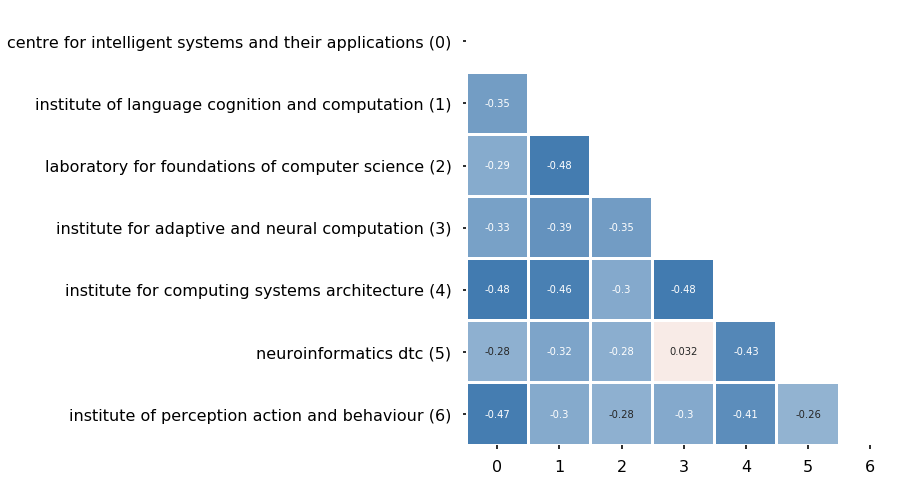

In [92]:
f = plt.figure(figsize=(10, 8))
ax = f.add_subplot(111)
ax = sns.heatmap(
    res[1:-2, 1:-2],
    yticklabels=[
        "{} ({})".format(x, i) for i, x in enumerate(attr_names[1:-2])
    ],
    cmap=sns.diverging_palette(245, 20, n=10, as_cmap=True),
    annot=True,
    linewidths=2,
    square=True,
    ax=ax,
    center=0,
    cbar=False,
    mask=np.triu(np.zeros_like(res_frac[1:-2, 1:-2]) == 0),
    robust=True)

### by degree

In [179]:
# add degrees to edges
nx.set_node_attributes(g_topicnet6yr, dict(g_topicnet6yr.degree), name='degree')
edges_dict, mat, count_dict, attr_names = get_mixing_dict(
    g_topicnet6yr, characteristic_name='degree')
target_order = sorted(attr_names)
edges_dict, mat, count_dict, attr_names = get_mixing_dict(
    g_topicnet6yr, characteristic_name='degree', target_order=target_order)

In [180]:
# 1 vs world:
attr_names_degree_topicnet6yr = attr_names
diff_degree_topicnet6yr = one_vs_world(mat, attr_names, count_dict)

2018-04-08 14:16:43,067 : INFO : 1 within:9.0 outside:21.0
0.381 & 0.058
2018-04-08 14:16:43,068 : INFO : 2 within:4.0 outside:20.0
0.167 & 0.055
2018-04-08 14:16:43,069 : INFO : 3 within:22.0 outside:43.0
0.309 & 0.119
2018-04-08 14:16:43,069 : INFO : 4 within:10.0 outside:48.0
0.199 & 0.133
2018-04-08 14:16:43,070 : INFO : 5 within:1.0 outside:23.0
0.064 & 0.064
2018-04-08 14:16:43,070 : INFO : 6 within:2.0 outside:38.0
0.088 & 0.105
2018-04-08 14:16:43,071 : INFO : 7 within:1.0 outside:33.0
0.064 & 0.091
2018-04-08 14:16:43,072 : INFO : 8 within:1.0 outside:22.0
0.039 & 0.061
2018-04-08 14:16:43,072 : INFO : 9 within:1.0 outside:25.0
0.039 & 0.069
2018-04-08 14:16:43,073 : INFO : 10 within:24.0 outside:52.0
0.123 & 0.144
2018-04-08 14:16:43,073 : INFO : 11 within:1.0 outside:31.0
0.039 & 0.086
2018-04-08 14:16:43,074 : INFO : 12 within:13.0 outside:82.0
0.111 & 0.227
2018-04-08 14:16:43,075 : INFO : 13 within:10.0 outside:58.0
0.076 & 0.161
2018-04-08 14:16:43,075 : INFO : 14 within

In [100]:
diff

[-0.32332063711911363,
 -0.11184210526315791,
 -0.18966412742382274,
 -0.06570290858725761,
 8.65650969529147e-05,
 0.01739958448753462,
 0.027787396121883662,
 0.02224722991689751,
 0.030557479224376738,
 0.021121883656509716,
 0.04717797783933518,
 0.11573753462603878,
 0.08483379501385041,
 0.04605263157894737]

In [101]:
np.mean(diff)

-0.019823407202216068

In [102]:
# pairwise
res_prob, res_frac = pairwise_comparison(mat, attr_names,count_dict)

2018-04-08 12:55:32,991 : INFO : 1(39) - 2(14)
	within_i:9.0 within_j:4.0 btw_ij:4.0
	0.389 & 0.235
2018-04-08 12:55:32,991 : INFO : 1(39) - 3(29)
	within_i:9.0 within_j:22.0 btw_ij:5.0
	0.489 & 0.139
2018-04-08 12:55:32,992 : INFO : 1(39) - 4(17)
	within_i:9.0 within_j:10.0 btw_ij:5.0
	0.423 & 0.208
2018-04-08 12:55:32,993 : INFO : 1(39) - 5(5)
	within_i:9.0 within_j:1.0 btw_ij:0.0
	0.201 & 0.000
2018-04-08 12:55:32,994 : INFO : 1(39) - 6(7)
	within_i:9.0 within_j:2.0 btw_ij:5.0
	0.258 & 0.312
2018-04-08 12:55:32,994 : INFO : 1(39) - 7(5)
	within_i:9.0 within_j:1.0 btw_ij:0.0
	0.201 & 0.000
2018-04-08 12:55:32,995 : INFO : 1(39) - 8(3)
	within_i:9.0 within_j:1.0 btw_ij:1.0
	0.133 & 0.091
2018-04-08 12:55:32,996 : INFO : 1(39) - 9(3)
	within_i:9.0 within_j:1.0 btw_ij:0.0
	0.133 & 0.000
2018-04-08 12:55:32,997 : INFO : 1(39) - 10(10)
	within_i:9.0 within_j:24.0 btw_ij:0.0
	0.325 & 0.000
2018-04-08 12:55:32,997 : INFO : 1(39) - 11(3)
	within_i:9.0 within_j:1.0 btw_ij:0.0
	0.133 & 0.000
2

2018-04-08 12:55:33,044 : INFO : 7(5) - 5(5)
	within_i:1.0 within_j:1.0 btw_ij:2.0
	0.500 & 0.500
2018-04-08 12:55:33,045 : INFO : 7(5) - 6(7)
	within_i:1.0 within_j:2.0 btw_ij:6.0
	0.486 & 0.667
2018-04-08 12:55:33,045 : INFO : 7(5) - 8(3)
	within_i:1.0 within_j:1.0 btw_ij:4.0
	0.469 & 0.667
2018-04-08 12:55:33,046 : INFO : 7(5) - 9(3)
	within_i:1.0 within_j:1.0 btw_ij:0.0
	0.469 & 0.000
2018-04-08 12:55:33,046 : INFO : 7(5) - 10(10)
	within_i:1.0 within_j:24.0 btw_ij:4.0
	0.444 & 0.138
2018-04-08 12:55:33,047 : INFO : 7(5) - 11(3)
	within_i:1.0 within_j:1.0 btw_ij:0.0
	0.469 & 0.000
2018-04-08 12:55:33,048 : INFO : 7(5) - 12(9)
	within_i:1.0 within_j:13.0 btw_ij:10.0
	0.459 & 0.417
2018-04-08 12:55:33,048 : INFO : 7(5) - 13(6)
	within_i:1.0 within_j:10.0 btw_ij:2.0
	0.496 & 0.154
2018-04-08 12:55:33,049 : INFO : 7(5) - 14(2)
	within_i:1.0 within_j:1.0 btw_ij:0.0
	0.408 & 0.000
2018-04-08 12:55:33,049 : INFO : 8(3) - 1(39)
	within_i:1.0 within_j:9.0 btw_ij:1.0
	0.133 & 0.091
2018-04-0

2018-04-08 12:55:33,092 : INFO : 13(6) - 9(3)
	within_i:10.0 within_j:1.0 btw_ij:0.0
	0.444 & 0.000
2018-04-08 12:55:33,093 : INFO : 13(6) - 10(10)
	within_i:10.0 within_j:24.0 btw_ij:7.0
	0.469 & 0.171
2018-04-08 12:55:33,093 : INFO : 13(6) - 11(3)
	within_i:10.0 within_j:1.0 btw_ij:15.0
	0.444 & 0.577
2018-04-08 12:55:33,094 : INFO : 13(6) - 12(9)
	within_i:10.0 within_j:13.0 btw_ij:16.0
	0.480 & 0.410
2018-04-08 12:55:33,095 : INFO : 13(6) - 14(2)
	within_i:10.0 within_j:1.0 btw_ij:10.0
	0.375 & 0.476
2018-04-08 12:55:33,096 : INFO : 14(2) - 1(39)
	within_i:1.0 within_j:9.0 btw_ij:0.0
	0.093 & 0.000
2018-04-08 12:55:33,097 : INFO : 14(2) - 2(14)
	within_i:1.0 within_j:4.0 btw_ij:0.0
	0.219 & 0.000
2018-04-08 12:55:33,097 : INFO : 14(2) - 3(29)
	within_i:1.0 within_j:22.0 btw_ij:0.0
	0.121 & 0.000
2018-04-08 12:55:33,098 : INFO : 14(2) - 4(17)
	within_i:1.0 within_j:10.0 btw_ij:2.0
	0.188 & 0.154
2018-04-08 12:55:33,099 : INFO : 14(2) - 5(5)
	within_i:1.0 within_j:1.0 btw_ij:0.0
	0.4

In [103]:
res = np.subtract(res_frac, res_prob)

In [104]:
res = np.nan_to_num(res)

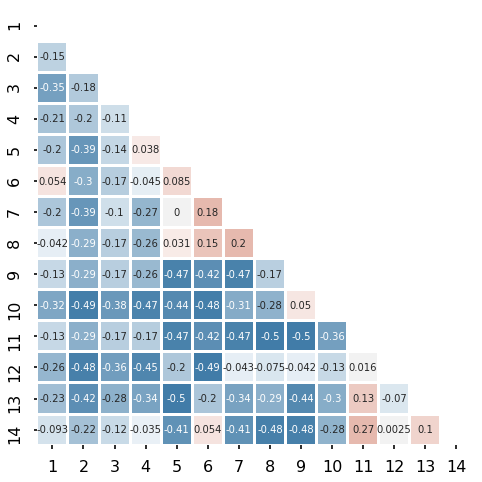

In [105]:
f = plt.figure(figsize=(10,8))
ax= f.add_subplot(111)
ax = sns.heatmap(
    res,
    yticklabels=attr_names,
    xticklabels=attr_names,
    cmap=sns.diverging_palette(240, 20, n=9, as_cmap=True),
    annot=True,
    linewidths=2,
    square=True,
    ax=ax,
    center=0,
    cbar=False,
    mask=np.triu(np.zeros_like(res_frac)==0),
    robust=True)

# `topicnetrestdblp`

In [93]:
# load network using adjmat
with open('../../data/data_schoolofinf/poinf_collabgraph_2012-2017.txt') as f:
    nodeorder_6yr = [a.strip() for a in f.readlines()]

adjmat_topicnetreft6yr= pkl.load(open('../../embedding/notebooks/res/topicnetref6yr_adjmat.pkl','rb'))

g_topicnetref6yr = adj_mat_to_graph(adjmat_topicnetreft6yr, nodeorder_6yr)

# add node attributes:
nx.set_node_attributes(g_topicnetref6yr, lookup_poinf.loc[list(
   g_topicnetref6yr.nodes)]['full_name'].to_dict(), 'name')
nx.set_node_attributes(g_topicnetref6yr, lookup_poinf.loc[list(
    g_topicnetref6yr.nodes)]['institute'].to_dict(), 'institute')
nx.set_node_attributes(g_topicnetref6yr, lookup_poinf.loc[list(
    g_topicnetref6yr.nodes)]['position'].to_dict(), 'position')
nx.set_node_attributes(g_topicnetref6yr, lookup_poinf.loc[list(
    g_topicnetref6yr.nodes)]['first_pub_year'].to_dict(), 'year')

print(nx.info(g_topicnetref6yr))

Name: 
Type: Graph
Number of nodes: 119
Number of edges: 361
Average degree:   6.0672


## homophily

### by inst

In [163]:
edges_dict, mat, count_dict, attr_names = get_mixing_dict(
    g_topicnetref6yr, characteristic_name='institute', target_order=inst_order)

In [164]:
# 1 vs world:
diff = one_vs_world(mat, attr_names, count_dict)

2018-04-08 14:13:03,383 : INFO : UNKNOWN within:4.0 outside:12.0
0.111 & 0.033
2018-04-08 14:13:03,384 : INFO : centre for intelligent systems and their applications within:2.0 outside:16.0
0.096 & 0.044
2018-04-08 14:13:03,385 : INFO : institute of language cognition and computation within:201.0 outside:24.0
0.441 & 0.066
2018-04-08 14:13:03,386 : INFO : laboratory for foundations of computer science within:49.0 outside:1.0
0.377 & 0.003
2018-04-08 14:13:03,386 : INFO : institute for adaptive and neural computation within:12.0 outside:28.0
0.195 & 0.078
2018-04-08 14:13:03,387 : INFO : institute for computing systems architecture within:32.0 outside:0.0
0.208 & 0.000
2018-04-08 14:13:03,388 : INFO : neuroinformatics dtc within:6.0 outside:24.0
0.111 & 0.066
2018-04-08 14:13:03,389 : INFO : institute of perception action and behaviour within:0.0 outside:2.0
0.017 & 0.006
2018-04-08 14:13:03,389 : INFO : deanery of clinical sciences within:0.0 outside:1.0
0.017 & 0.003
2018-04-08 14:13:

In [96]:
for i in diff:
    print('{:.3f}'.format(i))

-0.077
-0.051
-0.374
-0.374
-0.117
-0.208
-0.044
-0.011
-0.014
-0.011


In [97]:
np.mean(diff)

-0.12824669056151056

In [ ]:
# pairwise
res_prob, res_frac = pairwise_comparison(mat, attr_names, count_dict)

In [ ]:
res = np.subtract(res_frac, res_prob)

In [ ]:
f = plt.figure(figsize=(10, 8))
ax = f.add_subplot(111)
ax = sns.heatmap(
    res[1:-2, 1:-2],
    yticklabels=[
        "{} ({})".format(x, i) for i, x in enumerate(attr_names[1:-2])
    ],
    cmap=sns.diverging_palette(245, 20, n=10, as_cmap=True),
    annot=True,
    linewidths=2,
    square=True,
    ax=ax,
    center=0,
    cbar=False,
    mask=np.triu(np.zeros_like(res_frac[1:-2, 1:-2]) == 0),
    robust=True)

### by degree

In [175]:
# add degrees to edges
nx.set_node_attributes(g_topicnetref6yr, dict(g_topicnetref6yr.degree), name='degree')
edges_dict, mat, count_dict, attr_names = get_mixing_dict(
    g_topicnetref6yr, characteristic_name='degree')
target_order = sorted(attr_names)
edges_dict, mat, count_dict, attr_names = get_mixing_dict(
    g_topicnetref6yr, characteristic_name='degree', target_order=target_order)

In [176]:
# 1 vs world:
attr_names_degree_topicnetref6yr = attr_names
diff_degree_topicneref6yr = one_vs_world(mat, attr_names, count_dict)

2018-04-08 14:15:59,523 : INFO : 1 within:8.0 outside:16.0
0.393 & 0.044
2018-04-08 14:15:59,524 : INFO : 2 within:5.0 outside:22.0
0.233 & 0.061
2018-04-08 14:15:59,524 : INFO : 3 within:2.0 outside:14.0
0.096 & 0.039
2018-04-08 14:15:59,525 : INFO : 4 within:1.0 outside:26.0
0.111 & 0.072
2018-04-08 14:15:59,526 : INFO : 5 within:3.0 outside:29.0
0.111 & 0.080
2018-04-08 14:15:59,526 : INFO : 6 within:3.0 outside:48.0
0.140 & 0.133
2018-04-08 14:15:59,527 : INFO : 7 within:0.0 outside:28.0
0.065 & 0.078
2018-04-08 14:15:59,527 : INFO : 8 within:25.0 outside:54.0
0.195 & 0.150
2018-04-08 14:15:59,528 : INFO : 9 within:1.0 outside:34.0
0.065 & 0.094
2018-04-08 14:15:59,529 : INFO : 10 within:0.0 outside:20.0
0.033 & 0.055
2018-04-08 14:15:59,529 : INFO : 11 within:0.0 outside:11.0
0.017 & 0.030
2018-04-08 14:15:59,530 : INFO : 13 within:0.0 outside:13.0
0.017 & 0.036
2018-04-08 14:15:59,530 : INFO : 16 within:2.0 outside:44.0
0.049 & 0.122
2018-04-08 14:15:59,531 : INFO : 17 within:0.0

In [ ]:
diff

In [ ]:
np.mean(diff)

In [ ]:
# pairwise
res_prob, res_frac = pairwise_comparison(mat, attr_names,count_dict)

In [ ]:
res = np.subtract(res_frac, res_prob)

In [ ]:
res = np.nan_to_num(res)

In [ ]:
f = plt.figure(figsize=(10,8))
ax= f.add_subplot(111)
ax = sns.heatmap(
    res,
    yticklabels=attr_names,
    xticklabels=attr_names,
    cmap=sns.diverging_palette(240, 20, n=9, as_cmap=True),
    annot=True,
    linewidths=2,
    square=True,
    ax=ax,
    center=0,
    cbar=False,
    mask=np.triu(np.zeros_like(res_frac)==0),
    robust=True)

# Visualisation for infnet6yr(s)

In [ ]:
# create standard pos for all networks:
pos_standard = pos_G_infnet6yr_gn

In [ ]:
pos_standard = nx.spring_layout(g_infnet6yr, k=.13)
pos_standard = nx.spring_layout(G_infnet6yr_gn, k=.15, pos=pos_standard)

### INFNET6yr diff clustering alg

In [ ]:
# draw infnet6yr first: <GN> <ORGIGINAL> <MOD>
f = plt.figure(figsize=(18,6))
ax1 = f.add_subplot(131)
nx.draw(
    G_infnet6yr_gn,
    pos_standard,
    ax=ax1,
    node_size=50,
    node_color=artist.color_by_comm(best_partition_gn_infnet6yr, G_infnet6yr_gn.node),
    alpha=.5)
ax2 = f.add_subplot(132)
nx.draw(
    g_infnet6yr,
    pos_standard,
    ax=ax2,
    node_size=50,
    node_color=artist.color_by_inst(g_infnet6yr, lookup_poinf),
    alpha=.5)

ax3 = f.add_subplot(133)
nx.draw(
    G_infnet6yr_mod,
    pos_standard,
    ax=ax3,
    node_size=50,
    node_color=artist.color_by_comm(best_partition_mod_infnet6yr, G_infnet6yr_mod.node),
    alpha=.5)

f.tight_layout()

In [ ]:
# draw infnet6yr first: <GN> <ORGIGINAL> <MOD>
f = plt.figure(figsize=(18,6))
ax1 = f.add_subplot(131)
nx.draw(
    G_infnet6yr_gn,
    pos_standard,
    ax=ax1,
    node_size=60,
    node_color=artist.color_by_comm(best_partition_gn_infnet6yr, G_infnet6yr_gn.node),
    alpha=.5)
ax1.set_title('Using GN')

ax2 = f.add_subplot(132)
nx.draw(
    g_infnet6yr,
    pos_standard,
    ax=ax2,
    node_size=60,
    node_color=artist.color_by_inst(g_infnet6yr, lookup_poinf),
    alpha=.5)
ax2.set_title('infnet-6yr')

ax3 = f.add_subplot(133)
nx.draw(
    G_infnet6yr_mod,
    pos_standard,
    ax=ax3,
    node_size=60,
    node_color=artist.color_by_comm(best_partition_mod_infnet6yr, G_infnet6yr_mod.node),
    alpha=.5)
ax3.set_title('Using Mod')
f.tight_layout()

In [ ]:
f.savefig('IMG/infnet6yr_clustersv2.pdf',format='pdf',bbox_inches='tight')

### INFNET6yr-w diff clustering alg

In [ ]:
def get_edgewidth(g):
    return [max(0.4, d['weight'] * 3.) for (u, v, d) in g.edges(data=True)]

In [ ]:
### draw infnet6yr first: <GN> <ORGIGINAL> <MOD>
f = plt.figure(figsize=(18,6))
ax1 = f.add_subplot(131)
nx.draw(
    G_infnet6yr_w_gn,
    pos_standard,
    ax=ax1,
    node_size=50,
    width=get_edgewidth(G_infnet6yr_w_gn),
    node_color=artist.color_by_comm(best_partition_gn_infnet6yr_w, G_infnet6yr_w_gn.node),
    alpha=.5)
ax2 = f.add_subplot(132)
nx.draw(
    g_infnet6yr_w,
    pos_standard,
    ax=ax2,
    node_size=50,
    width=get_edgewidth(g_infnet6yr_w),
    node_color=artist.color_by_inst(g_infnet6yr_w, lookup_poinf),
    alpha=.5)

ax3 = f.add_subplot(133)
nx.draw(
    G_infnet6yr_w_mod,
    pos_standard,
    ax=ax3,
    node_size=50,
    width=get_edgewidth(G_infnet6yr_w_mod),
    node_color=artist.color_by_comm(best_partition_mod_infnet6yr_w, G_infnet6yr_w_mod.node),
    alpha=.5)

f.tight_layout()

In [ ]:
pos_standard = nx.spring_layout(g_infnet6yr_w, k=.13)
pos_standard = nx.spring_layout(G_infnet6yr_w_gn,  pos=pos_standard)

In [ ]:
# draw infnet6yr first: <GN> <ORGIGINAL> <MOD>
f = plt.figure(figsize=(18,6))
ax1 = f.add_subplot(131)
nx.draw(
    G_infnet6yr_w_gn,
    pos_standard,
    ax=ax1,
    node_size=50,
    width=get_edgewidth(G_infnet6yr_w_gn),
    node_color=artist.color_by_comm(best_partition_gn_infnet6yr_w, G_infnet6yr_w_gn.node),
    alpha=.5)
ax1.set_title('Using GN')
ax2 = f.add_subplot(132)
nx.draw(
    g_infnet6yr_w,
    pos_standard,
    ax=ax2,
    node_size=50,
    width=get_edgewidth(g_infnet6yr_w),
    node_color=artist.color_by_inst(g_infnet6yr_w, lookup_poinf),
    alpha=.5)
ax2.set_title('infnet-6yr(w)')
ax3 = f.add_subplot(133)
nx.draw(
    G_infnet6yr_w_mod,
    pos_standard,
    ax=ax3,
    node_size=50,
    width=get_edgewidth(G_infnet6yr_w_mod),
    node_color=artist.color_by_comm(best_partition_mod_infnet6yr_w, G_infnet6yr_w_mod.node),
    alpha=.5)
ax3.set_title('Using Mod')
f.tight_layout()

In [ ]:
f.savefig('IMG/infnet6yr_w_clustersv2.pdf',format='pdf',bbox_inches='tight')

### topicnet - diff clustering algo

In [ ]:
_pos = nx.spring_layout(g_topicnet6yr)
pos_standard = nx.spring_layout(G_topicnet6yr_gn, k=.21, pos=_pos)

In [ ]:
# draw infnet6yr first: <GN> <ORGIGINAL> <MOD>
f = plt.figure(figsize=(18,6))
ax1 = f.add_subplot(131)
nx.draw(
    G_topicnet6yr_gn,
    pos_standard,
    ax=ax1,
    node_size=60,
    node_color=artist.color_by_comm(best_partition_gn_topicnet6yr, G_topicnet6yr_gn.node),
    alpha=.5)
ax2 = f.add_subplot(132)
nx.draw(
    g_topicnet6yr,
    pos_standard,
    ax=ax2,
    node_size=60,
    node_color=artist.color_by_inst(g_topicnet6yr, lookup_poinf),
    alpha=.5)

ax3 = f.add_subplot(133)
nx.draw(
    G_topicnet6yr_mod,
    pos_standard,
    ax=ax3,
    node_size=60,
    node_color=artist.color_by_comm(best_partition_mod_topicnet6yr, G_topicnet6yr_gn.node),
    alpha=.5)

f.tight_layout()

In [ ]:
f.savefig('IMG/topicnet6yr_w_clusters.png',format='png',bbox_inches='tight')

### INFNET6YR vs TOPICNET

In [82]:

# infnet6yr have more nodes than topicnet => use infnet6yr as the base pos
pos_standard = nx.spring_layout(g_infnet6yr,k=.24)
# pos_standard = nx.spring_layout(, pos=pos_standard)

In [ ]:
# draw infnet6yr first: <IFNNET> <TOPICNET>
f = plt.figure(figsize=(12,6))
ax1 = f.add_subplot(121)
nx.draw(
    g_infnet6yr,
    pos_standard,
    ax=ax1,
    node_size=60,
    node_color=artist.color_by_inst(g_infnet6yr,lookup_poinf),
    alpha=.5)
ax2 = f.add_subplot(122)
nx.draw(
    g_topicnet6yr,
    pos_standard,
    ax=ax2,
    node_size=60,
    node_color=artist.color_by_inst(g_topicnet6yr, lookup_poinf),
    alpha=.5)
f.tight_layout()

In [ ]:
f.savefig('IMG/topicnet6yrVSinfnet6yr_pos_infnet.png',format='png',bbox_inches='tight')

In [ ]:
topicnet6yr_mod = g_topicnet6yr.copy()
for n in g_infnet6yr:
    if n not in topicnet6yr_mod:
        topicnet6yr_mod.add_node(n)

In [ ]:
pos_standard = nx.spring_layout(g_infnet6yr)
pos_standard = nx.spring_layout(topicnet6yr_mod, pos=pos_standard)

In [ ]:
# draw infnet6yr first: <IFNNET> <TOPICNET>
f = plt.figure(figsize=(15,6))
ax1 = f.add_subplot(121)
nx.draw(
    g_infnet6yr,
    pos_standard,
    ax=ax1,
    node_size=60,
    node_color=artist.color_by_inst(g_infnet6yr,lookup_poinf),
    alpha=.5)
ax2 = f.add_subplot(122)
nx.draw(
    g_topicnet6yr,
    pos_standard,
    ax=ax2,
    node_size=60,
    node_color=artist.color_by_inst(g_topicnet6yr, lookup_poinf),
    alpha=.5)
f.tight_layout()

In [ ]:
f.savefig('IMG/topicnet6yrVSinfnet6yr_pos_topicnet.png',format='png',bbox_inches='tight')

# Homophily res

Text(0.5,0,'Node degree')

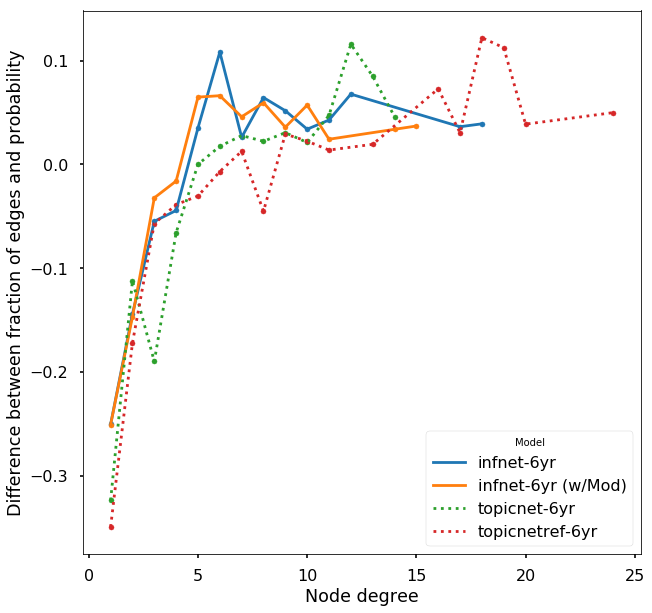

In [193]:
f = plt.figure(figsize=(10,10))
ax = f.add_subplot(111)
ax.plot(attr_names_degree_infnet6yr, diff_degree_infnet6yr,label='infnet-6yr')
ax.scatter(attr_names_degree_infnet6yr, diff_degree_infnet6yr,s=25)
ax.plot(attr_names_degree_infnet6yr_mod, diff_degree_infnet6yr_mod,label='infnet-6yr (w/Mod)')
ax.scatter(attr_names_degree_infnet6yr_mod, diff_degree_infnet6yr_mod,s=25)

ax.plot(attr_names_degree_topicnet6yr, diff_degree_topicnet6yr, label='topicnet-6yr', ls=':')
ax.scatter(attr_names_degree_topicnet6yr, diff_degree_topicnet6yr, s=25)
ax.plot(attr_names_degree_topicnetref6yr, diff_degree_topicneref6yr, label='topicnetref-6yr',ls=':')
ax.scatter(attr_names_degree_topicneref6yr, diff_degree_topicneref6yr,s=25)
ax.legend(title='Model')
ax.set_ylabel('Difference between fraction of edges and probability')
ax.set_xlabel('Node degree')

In [194]:
f.savefig('IMG/node_degrees_compiled.pdf',format='pdf',bbox_inches='tight')

---

# `infnet20yr`

In [ ]:
# infnet20yr:
g_infnet20yr = nx.Graph()
# add edges:
poinf_list = lookup_poinf.index.tolist()
edges = lookup_pub.edges.tolist() # list of list
for e in edges:
    for (a,b) in e:
        if a in poinf_list and b in poinf_list:
            g_infnet20yr.add_edge(a,b)

In [ ]:
print(nx.info(g_infnet20yr))

In [ ]:
nx.set_node_attributes(g_infnet20yr, lookup_poinf.loc[list(
    g_infnet20yr.nodes)]['full_name'].to_dict(), 'name')
nx.set_node_attributes(g_infnet20yr, lookup_poinf.loc[list(
    g_infnet20yr.nodes)]['institute'].to_dict(), 'institute')
nx.set_node_attributes(g_infnet20yr, lookup_poinf.loc[list(
    g_infnet20yr.nodes)]['position'].to_dict(), 'position')
nx.set_node_attributes(g_infnet20yr, lookup_poinf.loc[list(
    g_infnet20yr.nodes)]['first_pub_year'].to_dict(), 'year')

In [ ]:
f = plt.figure(figsize=(12,8))
ax = f.add_subplot(111)
nx.draw(
    g_infnet20yr,
    node_size=60,
    ax=ax,
    node_color=artist.color_by_inst(g_infnet20yr, lookup_poinf))
artist.add_inst_labels(ax,with_legend=True)

In [ ]:
### Save graph in JSON format
dat = nx.readwrite.json_graph.node_link_data(g_infnet20yr)

In [ ]:
import json
json.dump(dat, open('../../data/data_schoolofinf/json/infnet20yr.json','w'))

## Assortative Mixing (homophily)

### assortative by institute

In [ ]:
g_infnet20yr_inst_e = \
    nx.attribute_mixing_dict(g_infnet20yr, attribute='institute')

In [ ]:
nx.attribute_assortativity_coefficient(g_infnet20yr,attribute='institute')

### assortative by year

In [ ]:
g_infnet20yr_year_e = \
nx.assortativity.attribute_mixing_dict(g_infnet20yr,attribute='year')

In [ ]:
nx.assortativity.attribute_assortativity_coefficient(g_infnet20yr, attribute='year')

### assortative by node degree

In [ ]:
g_infnet20yr_deg_e = \
nx.assortativity.degree_mixing_matrix(g_infnet20yr)

In [ ]:
nx.degree_assortativity_coefficient(g_infnet20yr)

### assortative mixing by number of publications

In [ ]:
nx.set_node_attributes(g_infnet20yr,
                       lookup_poinf.total_pub_1997.loc[list(g_infnet20yr.node)].to_dict(),
                       "nb_publication"
                      )

In [ ]:
nx.assortativity.numeric_assortativity_coefficient(g_infnet20yr, attribute='nb_publication')